In [ ]:
#Connect with Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import datetime

import pandas as pd
import numpy as np
from numpy import array
import random

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import tensorflow as tf
seed_value= 0
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)
from tensorflow import keras

from sklearn.ensemble import VotingClassifier

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import classification_report ,confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
def get_data_from_years(dataframe, wanted_years):
  assert type(wanted_years) is list
  assert len(wanted_years) > 0

  idx = []
  for index, row in dataframe.iterrows():
    if int(str(row['dates'])[:4]) in wanted_years:
      idx.append(index)

  return pd.DataFrame(dataframe.iloc[idx]).reset_index(drop=True)

def group_date(date):
  date = date.strip()
  d, m, y = date.split('/')
  year, week, weekday = datetime.date(int(y), int(m), int(d)).isocalendar()
  return str(year) + str(week).zfill(2)

In [ ]:
def stat_model_predict(clf, x, y):
 
  predictions = clf.predict(x)
  y_hat = pd.DataFrame(predictions)

  print(classification_report(y, predictions, digits=4))

  cm = confusion_matrix(y, predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()

  return y_hat

data = data.reset_index(drop=True)

all_years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
split_index = 6

model_train = get_data_from_years(data, all_years[:split_index])
model_test = get_data_from_years(data, all_years[6:])

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/soybean_dataset.csv')
data

,week,dates,price_next_week,sum_c_vec,sum_tf_vec,news_price,MACD,MACD_SIGNAL,MACD_DIFF,TAS_K,...,Crushing_Million Bushels,Ending Stocks_Million Bushels,Exports_Million Bushels,Imports_Million Bushels,Production_Million Bushels,Residual Use_Million Bushels,Seed Use_Million Bushels,Total demand_Million Bushels,Total Supply_Million Bushels,Yield_Bushels/Acre
0,วันที่ 9 -13 กุมภาพันธ์ 2558,201507,1,115,6.063669,-1,-10.640456,-12.772359,2.131903,40.442610,...,1795.0,385.0,1790.0,25.0,3969.0,24.0,92.0,3701.0,4086.0,47.8
1,วันที่ 16-20 กุมภาพันธ์ 2558,201508,1,107,5.812786,0,-3.022899,-8.237728,5.214829,81.127346,...,1795.0,385.0,1790.0,25.0,3969.0,24.0,92.0,3701.0,4086.0,47.8
2,วันที่ 23 - 27กุมภาพันธ์2558,201509,0,109,5.753888,0,2.948086,-2.374953,5.323039,82.485961,...,1795.0,385.0,1790.0,25.0,3969.0,24.0,92.0,3701.0,4086.0,47.8
3,วันที่ 2 - 6 มีนาคม 2558,201510,0,92,5.227960,0,4.384361,2.591326,1.793035,45.347177,...,1795.0,385.0,1790.0,25.0,3969.0,24.0,92.0,3701.0,4086.0,47.8
4,วันที่ 9-13 มีนาคม 2558,201511,0,100,5.703614,0,-1.004628,1.145109,-2.149738,25.504981,...,1795.0,385.0,1790.0,25.0,3969.0,24.0,92.0,3701.0,4086.0,47.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,วันที่ 3-7 มกราคม 2565,202201,0,196,8.822123,1,30.709619,24.604390,6.105229,94.230787,...,2190.0,340.0,2050.0,15.0,4425.0,15.0,102.0,4356.0,4696.0,51.2
354,วันที่ 10-14 มกราคม 2565,202202,1,240,8.600711,1,32.286825,30.261029,2.025796,80.174787,...,2190.0,350.0,2050.0,15.0,4435.0,16.0,102.0,4357.0,4707.0,51.4
355,วันที่ 17-21 มกราคม 2565,202203,1,191,8.671932,0,26.811105,28.807734,-1.996629,81.269727,...,2190.0,350.0,2050.0,15.0,4435.0,16.0,102.0,4357.0,4707.0,51.4
356,วันที่ 24-28 มกราคม 2565,202204,1,189,8.306811,0,29.307491,28.483037,0.824454,87.770796,...,2190.0,350.0,2050.0,15.0,4435.0,16.0,102.0,4357.0,4707.0,51.4


In [ ]:
x_columns = ['sum_c_vec', 'sum_tf_vec','news_price', 'MACD', 'MACD_SIGNAL', 
             'MACD_DIFF', 'TAS_K', 'TAS_D', 'TAS_DS', 'TAS_DSS', 'CMCI',
             'RSI', 'BB_MA', 'BB_UPPER', 'BB_LOWER', 'BB_WIDTH', 'BB_PERCENT',
             'Area Harvested_Million Acres', 'Area Planted_Million Acres',
             'Average Farm Price_US Dollars/Bushel', 'Begining Stocks_Million Bushels',
             'Crushing_Million Bushels', 'Ending Stocks_Million Bushels',
             'Exports_Million Bushels', 'Imports_Million Bushels', 'Production_Million Bushels',
             'Residual Use_Million Bushels', 'Seed Use_Million Bushels', 'Total demand_Million Bushels',
             'Total Supply_Million Bushels', 'Yield_Bushels/Acre']

y_train = model_train['price_next_week']
x_train = model_train[x_columns]

y_test = model_test['price_next_week']
x_test = model_test[x_columns]

y_hat = pd.DataFrame()

label = LabelEncoder()
y_train = label.fit_transform(y_train).astype(float)
y_test = label.fit_transform(y_test).astype(float)

In [ ]:
clf1 = LogisticRegression()
clf2 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1, weights='distance'))
clf3 = make_pipeline(StandardScaler(), svm.SVC(kernel='linear', probability=True))

# create model
def create_model():
  model = Sequential()
  model.add(Dense(x_train.shape[1], activation='relu', input_dim=x_train.shape[1]))
  model.add(Dense(128))
  model.add(Dense(64))
  model.add(Dense(32))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', metrics=['accuracy'], run_eagerly=True)
  return model
keras_model = KerasClassifier(build_fn=create_model)
keras_model._estimator_type = "classifier" 

clf4 = make_pipeline(StandardScaler(), keras_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  app.launch_new_instance()


In [ ]:
eclf = VotingClassifier(estimators=[('logit', clf1), ('knn', clf2), ('svm', clf3), ('keras_model', clf4)], voting='soft', weights=[0.25, 0.25, 0.25, 0.25])
eclf = eclf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


10/10 [==============================] - 1s 31ms/step - loss: 0.7163 - accuracy: 0.4735


              precision    recall  f1-score   support

         0.0     0.5000    0.2500    0.3333         4
         1.0     0.7000    0.8750    0.7778         8

    accuracy                         0.6667        12
   macro avg     0.6000    0.5625    0.5556        12
weighted avg     0.6333    0.6667    0.6296        12



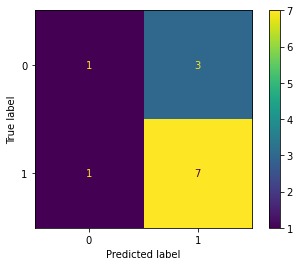

              precision    recall  f1-score   support

         0.0     0.7143    0.4545    0.5556        11
         1.0     0.6471    0.8462    0.7333        13

    accuracy                         0.6667        24
   macro avg     0.6807    0.6503    0.6444        24
weighted avg     0.6779    0.6667    0.6519        24



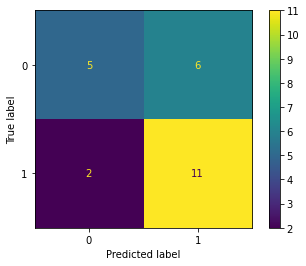

              precision    recall  f1-score   support

         0.0     0.6923    0.4737    0.5625        19
         1.0     0.5652    0.7647    0.6500        17

    accuracy                         0.6111        36
   macro avg     0.6288    0.6192    0.6062        36
weighted avg     0.6323    0.6111    0.6038        36



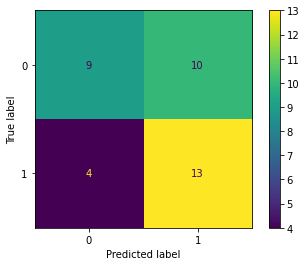

              precision    recall  f1-score   support

         0.0     0.6429    0.3600    0.4615        25
         1.0     0.5294    0.7826    0.6316        23

    accuracy                         0.5625        48
   macro avg     0.5861    0.5713    0.5466        48
weighted avg     0.5885    0.5625    0.5430        48



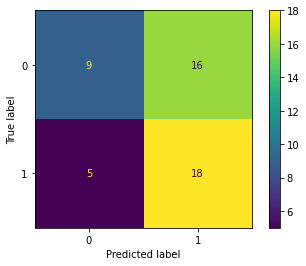

              precision    recall  f1-score   support

         0.0     0.6000    0.3462    0.4390        26
         1.0     0.5854    0.8000    0.6761        30

    accuracy                         0.5893        56
   macro avg     0.5927    0.5731    0.5575        56
weighted avg     0.5922    0.5893    0.5660        56



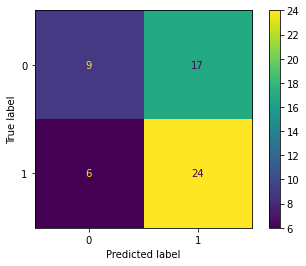

In [ ]:
for i in range(1,6):
  stat_model_predict(eclf, x_test[:i*12], y_test[:i*12])

              precision    recall  f1-score   support

         0.0     0.6000    0.3462    0.4390        26
         1.0     0.5854    0.8000    0.6761        30

    accuracy                         0.5893        56
   macro avg     0.5927    0.5731    0.5575        56
weighted avg     0.5922    0.5893    0.5660        56



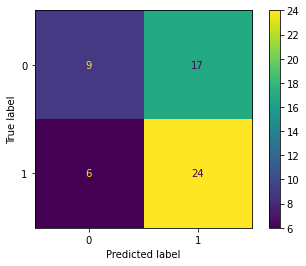

''

In [ ]:
stat_model_predict(eclf, x_test, y_test)
;

              precision    recall  f1-score   support

           0     0.9581    0.8989    0.9275       178
           1     0.9058    0.9611    0.9326       180

    accuracy                         0.9302       358
   macro avg     0.9319    0.9300    0.9301       358
weighted avg     0.9318    0.9302    0.9301       358



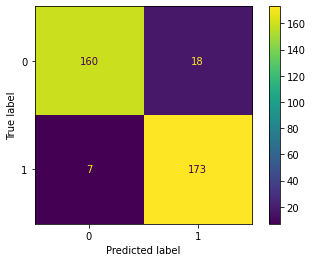

In [ ]:
y_hat['y_hat_ew'] = stat_model_predict(eclf, data[x_columns], data['price_next_week'])

In [ ]:
y_hat

,y_hat_ew
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
353,1.0
354,0.0
355,1.0
356,1.0


In [ ]:
week = data[['week', 'dates']]
week.reset_index(drop=True, inplace=True)
week.head()

,week,dates
0,วันที่ 9 -13 กุมภาพันธ์ 2558,201507
1,วันที่ 16-20 กุมภาพันธ์ 2558,201508
2,วันที่ 23 - 27กุมภาพันธ์2558,201509
3,วันที่ 2 - 6 มีนาคม 2558,201510
4,วันที่ 9-13 มีนาคม 2558,201511


In [ ]:
y_model = pd.DataFrame(data['price_next_week'])
y_model.head()

,price_next_week
0,1
1,1
2,0
3,0
4,0


In [ ]:
y = pd.concat([week, y_model, y_hat], ignore_index = False, axis = 1)
y['dates'] = y['dates'].astype(str)

In [ ]:
week_price = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/soybean_week_price.csv')
week_price = week_price[['Dates', 'PX_LAST']]
week_price = week_price.rename(columns={'Dates': 'dates', 'PX_LAST' : 'week_close_price'})

week_price['dates'] = week_price['dates'].apply(group_date)

week_price

,dates,week_close_price
0,200001,478.75
1,200002,496.25
2,200003,505.25
3,200004,523.50
4,200005,505.50
...,...,...
1153,202206,1583.00
1154,202207,1601.50
1155,202208,1590.25
1156,202209,1660.50


In [ ]:
p_return = pd.merge_ordered(y, week_price, on='dates', fill_method='ffill', how='left')
p_return

,week,dates,price_next_week,y_hat_ew,week_close_price
0,วันที่ 9 -13 กุมภาพันธ์ 2558,201507,1,1.0,990.50
1,วันที่ 16-20 กุมภาพันธ์ 2558,201508,1,1.0,999.25
2,วันที่ 23 - 27กุมภาพันธ์2558,201509,0,0.0,1030.75
3,วันที่ 2 - 6 มีนาคม 2558,201510,0,0.0,985.00
4,วันที่ 9-13 มีนาคม 2558,201511,0,0.0,974.00
...,...,...,...,...,...
353,วันที่ 3-7 มกราคม 2565,202201,0,1.0,1410.25
354,วันที่ 10-14 มกราคม 2565,202202,1,0.0,1369.75
355,วันที่ 17-21 มกราคม 2565,202203,1,1.0,1414.25
356,วันที่ 24-28 มกราคม 2565,202204,1,1.0,1470.00


In [ ]:
p_return = get_data_from_years(p_return, [2021, 2022])

in_index = 0
current_state = p_return['y_hat_ew'][0]
p_return['%return'] = None

for idx in p_return.index:
  if p_return['y_hat_ew'][idx] != current_state or idx == len(p_return.index)-1:
    if current_state == 1:
      A = p_return['week_close_price'][idx]
      B = p_return['week_close_price'][in_index]
    else:
      A = p_return['week_close_price'][in_index]
      B = p_return['week_close_price'][idx]

    p_return.loc[idx, '%return'] = (A - B)*100 / B

    in_index = idx
    current_state = p_return['y_hat_ew'][idx]

p_return.loc[p_return.index[-1], '%return'] += 0.25
p_return

,week,dates,price_next_week,y_hat_ew,week_close_price,%return
0,วันที่ 4 - 8 มกราคม 2564,202101,1,1.0,1374.75,None
1,วันที่ 11-15 มกราคม 2564,202102,0,1.0,1416.75,None
2,วันที่ 18-22 มกราคม 2564,202103,0,0.0,1311.75,-4.582651
3,วันที่ 25-29 มกราคม 2564,202104,1,0.0,1370.00,None
4,วันที่ 1-5 กุมภาพันธ์ 2564,202105,1,1.0,1366.75,-4.024145
5,วันที่ 8-11 กุมภาพันธ์ 2564,202106,1,1.0,1372.00,None
6,วันที่ 15-19 กุมภาพันธ์ 2564,202107,1,1.0,1377.25,None
7,วันที่ 22-25 กุมภาพันธ์ 2564,202108,1,1.0,1405.25,None
8,วันที่ 1-5 มีนาคม 2564,202109,1,1.0,1430.00,None
9,วันที่ 8-12 มีนาคม 2564,202110,0,1.0,1413.25,None


In [ ]:
p_return['%return_after_comm'] = p_return['%return'].apply(lambda x : None if x is None else x-0.5)
p_return

,week,dates,price_next_week,y_hat_ew,week_close_price,%return,%return_after_comm
0,วันที่ 4 - 8 มกราคม 2564,202101,1,1.0,1374.75,None,NaN
1,วันที่ 11-15 มกราคม 2564,202102,0,1.0,1416.75,None,NaN
2,วันที่ 18-22 มกราคม 2564,202103,0,0.0,1311.75,-4.582651,-5.082651
3,วันที่ 25-29 มกราคม 2564,202104,1,0.0,1370.00,None,NaN
4,วันที่ 1-5 กุมภาพันธ์ 2564,202105,1,1.0,1366.75,-4.024145,-4.524145
5,วันที่ 8-11 กุมภาพันธ์ 2564,202106,1,1.0,1372.00,None,NaN
6,วันที่ 15-19 กุมภาพันธ์ 2564,202107,1,1.0,1377.25,None,NaN
7,วันที่ 22-25 กุมภาพันธ์ 2564,202108,1,1.0,1405.25,None,NaN
8,วันที่ 1-5 มีนาคม 2564,202109,1,1.0,1430.00,None,NaN
9,วันที่ 8-12 มีนาคม 2564,202110,0,1.0,1413.25,None,NaN


In [ ]:
np.mean(p_return['%return_after_comm'])/np.std(p_return['%return_after_comm'], ddof=1)

0.05836420061214655

In [ ]:
p_return['%return_after_comm'].sum()

5.5140258482895295

In [ ]:
all_years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
split_index = 6

summary = {
    'year' : [],
    '%return_after_comm' : [],
    'profit' : [],
    'loss' : [],
    'MDD' : []
}

for year in all_years:
  current_year_data = get_data_from_years(p_return, [year])
  summary['year'].append(year)
  summary['%return_after_comm'].append(round(current_year_data['%return_after_comm'].sum(), 2))
  summary['MDD'].append(abs(round(current_year_data['%return'].min(), 2)))
  summary['profit'].append(len(current_year_data[current_year_data['%return_after_comm'] >= 0]))
  summary['loss'].append(len(current_year_data[current_year_data['%return_after_comm'] < 0]))

In [ ]:
summary = pd.DataFrame(summary)
summary

,year,%return_after_comm,profit,loss,MDD
0,2015,0.00,0,0,NaN
1,2016,0.00,0,0,NaN
2,2017,0.00,0,0,NaN
3,2018,0.00,0,0,NaN
4,2019,0.00,0,0,NaN
5,2020,0.00,0,0,NaN
6,2021,-7.98,5,7,8.79
7,2022,13.50,2,1,3.15


In [ ]:
for idx in summary['profit'].index, summary['loss'].index:

  A = summary['profit'][idx]
  B = summary['loss'][idx]

  summary.loc[idx, 'accuracy'] = round((A / ( A + B ))*100, 2)

summary

,year,%return_after_comm,profit,loss,MDD,accuracy
0,2015,0.00,0,0,NaN,NaN
1,2016,0.00,0,0,NaN,NaN
2,2017,0.00,0,0,NaN,NaN
3,2018,0.00,0,0,NaN,NaN
4,2019,0.00,0,0,NaN,NaN
5,2020,0.00,0,0,NaN,NaN
6,2021,-7.98,5,7,8.79,41.67
7,2022,13.50,2,1,3.15,66.67


In [ ]:
(summary['profit'].sum()/(summary['profit'].sum()+summary['loss'].sum()))*100

46.666666666666664